<h1>Table of Contents<span class="tocSkip"></span></h1>

<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span>
    
<ul class="toc-item">   
    
<li><span><a href="#Dataset info" data-toc-modified-id="Dataset info-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Dataset info</a></span>

</li><li><span><a href="#Methodology" data-toc-modified-id="Methodology-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Methodology</a></span></li>

<li><span><a href="#Goal" data-toc-modified-id="Goal-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Goal</a></span>

</ul></li>

<li><span><a href="#Import-Packages-&amp;-Data" data-toc-modified-id="Import-Packages-&amp;-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Packages &amp; Data</a></span><ul class="toc-item"><li><span><a href="#Import-Packages" data-toc-modified-id="Import-Packages-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Import Packages</a></span></li><li><span><a href="#Import-Data" data-toc-modified-id="Import-Data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Import Data</a></span></li></ul></li>


<li><span><a href="#Data Analysis and Visualizations" data-toc-modified-id="Data Analysis and Visualizations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Analysis and Visualizations</a></span>
    
<ul>
    
<li><span><a href="#'Sentiment' Column" data-toc-modified-id="'Sentiment' Column-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>'Sentiment' Column</a></span>
    
 <ul>   
    
<li><span><a href="#Positive Tweets" data-toc-modified-id="Positive Tweets-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Positive Tweets</a></span>

</li><li><span><a href="#Negative Tweets" data-toc-modified-id="Negative Tweets-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Negative Tweets</a></span></li>

</ul></li>  
 
<li><span><a href="#'Brand' Column" data-toc-modified-id="'Brand' Column-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>'Brand' Column</a></span> 
 
<li><span><a href="#'Tweet' Column" data-toc-modified-id="'Tweet' Column-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>'Tweet' Column</a></span> 
 
</ul></li>

<li><span><a href="#Word2Vec Model" data-toc-modified-id="Word2Vec Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Word2Vec Model</a></span>
    
</ul></li>   

# Introduction

## Dataset Info

The dataset for this analysis can be found <a href="https://data.world/crowdflower/brands-and-product-emotions">here </a>

DESCRIPTION

Classify tweets reffering to Apple or Google products and services.

SUMMARY

	Before cleaning, the dataset is expected to be a csv file with three columns:
1.  'tweet_text ' column contains  tweet texts.
2.  'emotion_in_tweet_is_directed_at' column contains a product or service tweet is refering to.
3. ' is_there_an_emotion_directed_at_a_brand_or_product' column contains the emotion or lack of emotion in the tweet.

Acording to the website contributors were asked to evaluated tweets about Apple and Google brands and products. They were asked to label tweets as:

 'No emotion toward brand or product'
 
 'Positive emotion'
 
 'Negative emotion' 
 
 'I can't tell'.  


The dataset was added on August 30, 2013 by Kent Cavender-Bares 



## Methodology


We will adopt the OSEMiN data science workflow following the steps below:

Obtain (import the data)

Scrub (clean the data, deal with missing values and data types)

Explore (answer descriptives questions using EDA)

Model (build our predictive model)

Interpret (comment on our model and findings)

Having a machine learning model that can predict if a patient has or does not have heart disease could potentially save time in diagnosing the patient and may reduce the likelihood of a misclassification when used in conjunction with the doctor. This analysis will look at six different machine learning techniques.

## Goal

Our goal is to create an efficient and accurate tweet classification system that can help companies identify negative tweets to be adressed by the customer service team, and positive tweets to be showcased and used for training purposes. 

# Import Packages & Data

## Import Packages

In [1]:
!pip install wordcloud

In [2]:
#Import useful libraries
import re
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import nltk
from nltk import FreqDist
from nltk import word_tokenize
import string

from nltk.collocations import *
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer




[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/lauravlad/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lauravlad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Import Data

In [3]:
#creating dataset
dataset = pd.read_csv('list.csv', encoding ='latin1')
dataset.head(2)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion


# Data Analysis and Visualizations

In [4]:
#change name of columns
dataset.columns = [ 'Tweet','Brand', 'Sentiment' ]

In [5]:
#gathering information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
Tweet        9092 non-null object
Brand        3291 non-null object
Sentiment    9093 non-null object
dtypes: object(3)
memory usage: 213.2+ KB


We have one empty cell in the Tweet column and 5802 empty cells in the Brand column.

In [6]:
#check if column names changed.
dataset.head(2)

,Tweet,Brand,Sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion


In [7]:
#drop empty row.
dataset =dataset.drop([6])


In [8]:
dataset.Brand.value_counts()
#len(dataset)

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: Brand, dtype: int64

In [9]:
## We have 9092 rows. 5801 entries for the Brand column.
## Let's explore it further
## We'll start with the Sentiment column.

In [10]:
#Find duplicated rows
duplicateRowsData = dataset[dataset.duplicated()]
duplicateRowsData

,Tweet,Brand,Sentiment
468,"Before It Even Begins, Apple Wins #SXSW {link}",Apple,Positive emotion
776,Google to Launch Major New Social Network Call...,NaN,No emotion toward brand or product
2232,Marissa Mayer: Google Will Connect the Digital...,NaN,No emotion toward brand or product
2559,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion
3950,Really enjoying the changes in Gowalla 3.0 for...,Android App,Positive emotion
3962,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
4897,"Oh. My. God. The #SXSW app for iPad is pure, u...",iPad or iPhone App,Positive emotion
5338,RT @mention ÷¼ GO BEYOND BORDERS! ÷_ {link} ...,NaN,No emotion toward brand or product
5341,"RT @mention ÷¼ Happy Woman's Day! Make love, ...",NaN,No emotion toward brand or product
5881,RT @mention Google to Launch Major New Social ...,NaN,No emotion toward brand or product


In [11]:
# Get indexs of the duplicated rows.
duplicateIndex = []
for row in duplicateRowsData.index: 
    duplicateIndex.append(row)
print(duplicateIndex)  
len(duplicateIndex)

[468, 776, 2232, 2559, 3950, 3962, 4897, 5338, 5341, 5881, 5882, 5883, 5884, 5885, 6296, 6297, 6298, 6299, 6300, 6546, 8483, 8747]


22

In [12]:
dataset = dataset.drop(duplicateIndex)

In [13]:
#Check again for duplicates
duplicateRowsData = dataset[dataset.duplicated()]
duplicateRowsData


,Tweet,Brand,Sentiment


No duplicates left.

## 'Sentiment' column

In [14]:
#Analyze Sentiment column.
dataset.Sentiment.value_counts()

No emotion toward brand or product    5375
Positive emotion                      2970
Negative emotion                       569
I can't tell                           156
Name: Sentiment, dtype: int64

We have 3539 tweets with positive and negative emotions and 5531 neutral tweets. 

In [15]:
#Replace positive emotion with numbers from 0 to 4. I chose #4 for positive.
dataset.Sentiment = dataset.Sentiment.replace({'Positive emotion':'4', 'Negative emotion':'0', "I can't tell": '1', 'No emotion toward brand or product': '2'})
dataset.head()

,Tweet,Brand,Sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,4
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,4
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,4


Create 4 different datasets for each type of sentiment.

In [16]:
dataset_1 = dataset[dataset['Sentiment'] == '1']
dataset_1.head()
len(dataset_1)

156

In [17]:
dataset_2 = dataset[dataset['Sentiment'] == '2']
dataset_2.head()
len(dataset_2)

5375

In [18]:
dataset_0 = dataset[dataset['Sentiment'] == "0"]
len(dataset_0)

569

In [19]:
dataset_4 = dataset[dataset['Sentiment'] == "4"]
len(dataset_4)

2970

In [20]:
# Create dataset with positive and negative sentiments.
dataset_decided = pd.concat([dataset_0, dataset_4], ignore_index=True)
len(dataset_decided)
#dataset_decided.tail()

3539

In [24]:
neg_num = len(dataset_decided[dataset_decided['Sentiment'] == '0'])
pos_num = len(dataset_decided[dataset_decided['Sentiment'] == '4'])
neg_per = neg_num/(neg_num+pos_num)
pos_per = pos_num/(neg_num+pos_num)

In [28]:
dataset_decided.Sentiment.value_counts(normalize= True)

4    0.83922
0    0.16078
Name: Sentiment, dtype: float64

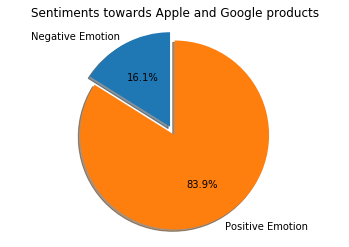

In [29]:
# Plot decided dataset.
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Negative Emotion', 'Positive Emotion'
sizes = [neg_per, pos_per]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sentiments towards Apple and Google products')

plt.show()

In [30]:
dataset.head()

,Tweet,Brand,Sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,4
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,4
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,4


## 'Tweet' column

In [31]:
# Analyse 'Tweet' column.
print(dataset['Tweet'][174])


I went to #sxswi and all I won was this lousy #iPad #sxsw :-) :-) {link}


We can see we have handles, emojies, punctuation, stop words that we need to take care.

In [32]:
# turn happy emojis into EMO_POS and unhappy emojis into EMO_NEG
def handle_emojis(tweet):
    # Smile -- :), : ), :-), (:, ( :, (-:, :')
    tweet = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\))', ' EMO_POS ', tweet)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    tweet = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' EMO_POS ', tweet)
    # Love -- <3, :*
    tweet = re.sub(r'(<3|:\*)', ' EMO_POS ', tweet)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-;
    tweet = re.sub(r'(;-?\)|;-?D|\(-?;)', ' EMO_POS ', tweet)
    # Sad -- :-(, : (, :(, ):, )-:
    tweet = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:)', ' EMO_NEG ', tweet)
    # Cry -- :,(, :'(, :"(
    tweet = re.sub(r'(:,\(|:\'\(|:"\()', ' EMO_NEG ', tweet)
    return tweet

In [33]:
#set up stopwords, 
STOPWORDS = stopwords.words('english')
STOPWORDS += list(string.punctuation)

In [34]:
STOPWORDS = set(STOPWORDS)

In [35]:
#remove word 'not' from it because it might be important when it comes to negative emotions.  
STOPWORDS.remove("not")

In [36]:
print(dataset['Tweet'][174]) 

I went to #sxswi and all I won was this lousy #iPad #sxsw :-) :-) {link}


In [37]:
#create a new column 'Clean Tweet' and lower cases.
dataset['Clean_tweet'] = dataset['Tweet'].apply(lambda tweet: tweet.lower())
dataset.Clean_tweet[174]

'i went to #sxswi and all i won was this lousy #ipad #sxsw :-) :-) {link}'

In [38]:
#deal with emoticons using the above function. 
dataset['Clean_tweet'] = dataset['Clean_tweet'].apply(lambda tweet: handle_emojis(tweet))
dataset.Clean_tweet[174]

'i went to #sxswi and all i won was this lousy #ipad #sxsw  EMO_POS   EMO_POS  {link}'

In [39]:
#remove user handles starting with @
dataset['Clean_tweet'] = dataset['Clean_tweet'].str.replace("@[\w]*","")
dataset.Clean_tweet[174]

'i went to #sxswi and all i won was this lousy #ipad #sxsw  EMO_POS   EMO_POS  {link}'

In [40]:
#remove special characters
dataset['Clean_tweet'] = dataset['Clean_tweet'].str.replace("[^a-zA-Z' ]","")
dataset.Clean_tweet[174]

'i went to sxswi and all i won was this lousy ipad sxsw  EMOPOS   EMOPOS  link'

In [41]:
#remove urls
dataset['Clean_tweet'] = dataset['Clean_tweet'].replace(re.compile(r"((www\.[^\s]+)|(https?://[^\s]+))"), "")
dataset.Clean_tweet[174]

'i went to sxswi and all i won was this lousy ipad sxsw  EMOPOS   EMOPOS  link'

In [42]:
#remove single characters
dataset['Clean_tweet'] = dataset['Clean_tweet'].replace(re.compile(r"(^| ).( |$)"), " ")
dataset.Clean_tweet[174]

' went to sxswi and all won was this lousy ipad sxsw  EMOPOS EMOPOS  link'

In [43]:
#tokenize
dataset['Clean_tweet'] = dataset['Clean_tweet'].str.split()
dataset.Clean_tweet[174]

['went',
 'to',
 'sxswi',
 'and',
 'all',
 'won',
 'was',
 'this',
 'lousy',
 'ipad',
 'sxsw',
 'EMOPOS',
 'EMOPOS',
 'link']

In [44]:
#remove stopwords
dataset['Clean_tweet'] = dataset['Clean_tweet'].apply(lambda tweet: [word for word in tweet if word not in STOPWORDS])
dataset.Clean_tweet[174]

['went', 'sxswi', 'lousy', 'ipad', 'sxsw', 'EMOPOS', 'EMOPOS', 'link']

In [45]:
#function to replace the n't with not.
def expand_tweet(tweet):
    expanded_tweet = []
    for word in tweet:
        if re.search("n't", word):
            expanded_tweet.append(word.split("n't")[0])
            expanded_tweet.append("not")
        else:
            expanded_tweet.append(word)
    return expanded_tweet


In [46]:
#replace "n't" with "not"
dataset['Clean_tweet'] = dataset['Clean_tweet'].apply(lambda tweet: expand_tweet(tweet))
dataset.Clean_tweet[174]

['went', 'sxswi', 'lousy', 'ipad', 'sxsw', 'EMOPOS', 'EMOPOS', 'link']

In [47]:
wordNetLemmatizer = WordNetLemmatizer()
porterStemmer = PorterStemmer()

In [48]:
#Lemanizing words
dataset['Clean_tweet'] = dataset['Clean_tweet'].apply(lambda tweet: [wordNetLemmatizer.lemmatize(word) for word in tweet])
dataset.Clean_tweet[174]

['went', 'sxswi', 'lousy', 'ipad', 'sxsw', 'EMOPOS', 'EMOPOS', 'link']

In [49]:
#Stemming the words
dataset['Clean_tweet'] = dataset['Clean_tweet'].apply(lambda tweet: [porterStemmer.stem(word) for word in tweet])
dataset.Clean_tweet[174]

['went', 'sxswi', 'lousi', 'ipad', 'sxsw', 'emopo', 'emopo', 'link']

In [50]:
#Combine words back to tweets
dataset['Clean_tweet'] = dataset['Clean_tweet'].apply(lambda tweet: ' '.join(tweet))
dataset.Clean_tweet[174]

'went sxswi lousi ipad sxsw emopo emopo link'

In [51]:
#compare Tweets with Clean_Tweets
print(dataset.Tweet[174])
print(dataset.Clean_tweet[174])

I went to #sxswi and all I won was this lousy #iPad #sxsw :-) :-) {link}
went sxswi lousi ipad sxsw emopo emopo link


In [52]:
#Delete column Tweet, we don't need it anymore.
cleaned_dataset = dataset.drop('Tweet', axis=1 )

In [53]:
cleaned_dataset.head()

,Brand,Sentiment,Clean_tweet
0,iPhone,0,g iphon hr tweet riseaustin dead need upgrad p...
1,iPad or iPhone App,4,know awesom ipadiphon app like appreci design ...
2,iPad,4,not wait ipad also sale sxsw
3,iPad or iPhone App,0,hope year' festiv crashi year' iphon app sxsw
4,Google,4,great stuff fri sxsw marissa mayer googl tim o...


In [54]:
#save dataset to csv
cleaned_dataset.to_csv('dataset_multi_valued.csv', index=False, header=True)

In [55]:
dataset_positive = dataset[dataset['Sentiment'] == '4'] 

In [56]:
dataset_negative = dataset[dataset['Sentiment'] == '0'] 

In [57]:
dataset_decided = pd.concat([dataset_positive, dataset_negative ], ignore_index=True)
dataset_decided.head()

,Tweet,Brand,Sentiment,Clean_tweet
0,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,4,know awesom ipadiphon app like appreci design ...
1,@swonderlin Can not wait for #iPad 2 also. The...,iPad,4,not wait ipad also sale sxsw
2,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,4,great stuff fri sxsw marissa mayer googl tim o...
3,"#SXSW is just starting, #CTIA is around the co...",Android,4,sxsw start ctia around corner googleio hop ski...
4,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,4,beauti smart simpl idea rt wrote hollergram ip...


In [58]:
#drop tweet column
clean_dataset_decided = dataset_decided.drop('Tweet', axis=1 )
clean_dataset_decided.head()

,Brand,Sentiment,Clean_tweet
0,iPad or iPhone App,4,know awesom ipadiphon app like appreci design ...
1,iPad,4,not wait ipad also sale sxsw
2,Google,4,great stuff fri sxsw marissa mayer googl tim o...
3,Android,4,sxsw start ctia around corner googleio hop ski...
4,iPad or iPhone App,4,beauti smart simpl idea rt wrote hollergram ip...


In [59]:
#save dataset to csv
clean_dataset_decided.to_csv('dataset_dichot.csv', index=False, header=True)

### Positive tweets

In [60]:
#Create a list of all the tweet texts.
positive_tweets = []
for tweet in dataset_positive['Clean_tweet']:
    positive_tweets.append(tweet)
#print(positive_tweets)

In [61]:
#Create bag of words for positive tweets. Instead of a list of tweets now we'll have a list of words.
positive_tweets_bag = ''.join([str(tweet) for tweet in dataset_positive['Clean_tweet']])
#print(positive_tweets_bag)

Text(0.5, 1.0, 'Most frequent words in positive tweets')

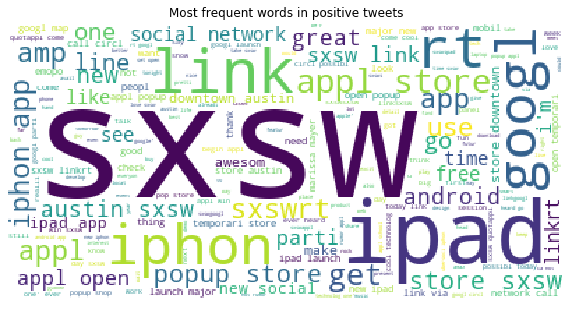

In [62]:
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white", max_words = 1000).generate(positive_tweets_bag)
plt.figure(figsize = (10, 6))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Most frequent words in positive tweets")

In [63]:
negative_tweets = []
for tweet in dataset_negative['Clean_tweet']:
    negative_tweets.append(tweet)
#print(positive_tweets)

In [64]:
#Create bag of words for negative tweets.
negative_tweets_bag = ''.join([str(tweet) for tweet in dataset_negative['Clean_tweet']])
#print(negative_tweets_bag)

Text(0.5, 1.0, 'Most frequent words in negative tweets')

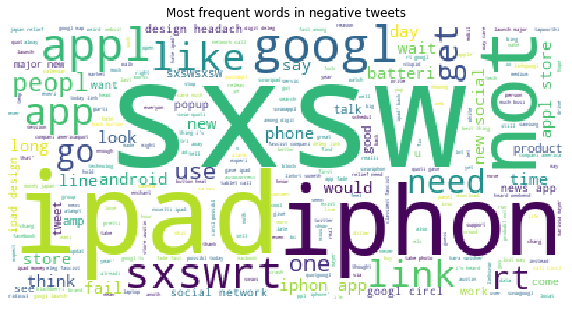

In [65]:
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white", max_words = 1000).generate(negative_tweets_bag)
plt.figure(figsize = (10, 6))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Most frequent words in negative tweets")

In [66]:
#tokenize positive tweets
positive_tokens = word_tokenize(positive_tweets_bag)

In [67]:
positive_freqdist = FreqDist(positive_tokens)

In [68]:
positive_most_common = positive_freqdist.most_common(200)


In [69]:
#type(positive_most_common)
df_positive = pd.DataFrame(positive_most_common, columns = ['words', 'word_count'])
df_positive.head()

,words,word_count
0,sxsw,1968
1,ipad,1079
2,appl,712
3,link,554
4,store,538


IPad and apple are two of the most frequet word in the positive tweets. 

'South by Southwest, stylized as SXSW and colloquially referred to as South By, is an annual conglomeration of parallel film, interactive media, and music festivals and conferences organized jointly that take place in mid-March in Austin, Texas, United States.' (Wikipedia)

In [70]:
#print(positive_most_common)

In [71]:
#Normalized frequency for the first most common words in positive tweets.
total_word_count_positive = sum(positive_freqdist.values())
positive_top_50 = positive_freqdist.most_common(50)
print('Word\t\t\tNormalized Frequency')
for word in positive_top_50:
    normalized_frequency = word[1] / total_word_count_positive
    print('{} \t\t\t {:.4}'.format(word[0], normalized_frequency))

Word			Normalized Frequency
sxsw 			 0.06234
ipad 			 0.03418
appl 			 0.02255
link 			 0.01755
store 			 0.01704
googl 			 0.0159
iphon 			 0.01558
' 			 0.01467
app 			 0.01454
rt 			 0.0108
new 			 0.01061
austin 			 0.008933
popup 			 0.00681
get 			 0.00624
launch 			 0.006082
android 			 0.00586
open 			 0.005733
amp 			 0.005607
sxswrt 			 0.005575
go 			 0.0051
linkrt 			 0.004783
not 			 0.00472
i 			 0.004435
one 			 0.004308
time 			 0.004276
parti 			 0.004245
come 			 0.004054
line 			 0.003896
use 			 0.003833
win 			 0.003801
social 			 0.003801
map 			 0.003706
'm 			 0.003643
like 			 0.003484
day 			 0.003421
today 			 0.003421
free 			 0.003358
circl 			 0.003326
cool 			 0.003073
great 			 0.003009
mobil 			 0.002978
network 			 0.002914
downtown 			 0.002756
see 			 0.002661
temporari 			 0.002566
love 			 0.002534
awesom 			 0.002471
peopl 			 0.002407
look 			 0.002376
via 			 0.002249


In [72]:
positive_df = pd.DataFrame(positive_most_common, columns = ['word', 'word_count'])
positive_df['word_count'] = pd.to_numeric(positive_df['word_count'], errors='ignore')
type(positive_df['word_count'][0])

numpy.int64

In [73]:
#positive_df.to_csv('positive_df.csv', index=False, header=True)

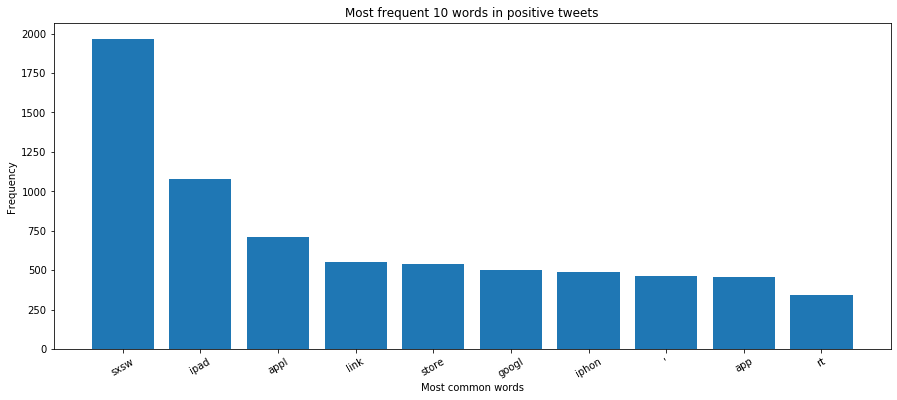

In [74]:
x_values=positive_df['word'][:10]
y_values=positive_df['word_count'][:10]
plt.figure(figsize=(15,6))
plt.bar(x_values, y_values, label="most frequent words")
plt.xlabel("Most common words")
plt.xticks( positive_df['word'][:10], rotation=30) 
plt.ylabel("Frequency")
plt.title('Most frequent 10 words in positive tweets')
plt.show()

### Negative tweets.

In [75]:
#tokenize negative tweets
negative_tokens = word_tokenize(negative_tweets_bag)

In [76]:
negative_freqdist = FreqDist(negative_tokens)

In [77]:
negative_most_common = negative_freqdist.most_common(200)

In [78]:
#print(negative_most_common)

In [79]:
total_word_count_negative = sum(negative_freqdist.values())
negative_top_50 = negative_freqdist.most_common(50)
print('Word\t\t\tNormalized Frequency')
for word in negative_top_50:
    normalized_frequency = word[1] / total_word_count_negative
    print('{} \t\t\t {:.4}'.format(word[0], normalized_frequency))

Word			Normalized Frequency
sxsw 			 0.04441
ipad 			 0.03026
iphon 			 0.02131
googl 			 0.01789
' 			 0.01464
not 			 0.01464
app 			 0.01432
appl 			 0.01285
sxswrt 			 0.008459
link 			 0.007971
store 			 0.006995
like 			 0.006833
rt 			 0.006507
new 			 0.006507
need 			 0.005531
circl 			 0.005531
get 			 0.00488
social 			 0.004718
design 			 0.004718
launch 			 0.004718
v 			 0.004555
i 			 0.004392
go 			 0.00423
peopl 			 0.00423
use 			 0.003742
one 			 0.003742
take 			 0.003579
call 			 0.003416
time 			 0.003416
line 			 0.003254
android 			 0.003254
say 			 0.003254
austin 			 0.003254
think 			 0.003254
day 			 0.003091
look 			 0.003091
news 			 0.002928
would 			 0.002928
today 			 0.002766
'm 			 0.002603
batteri 			 0.002603
long 			 0.002603
phone 			 0.002603
fail 			 0.002603
year 			 0.00244
come 			 0.00244
wait 			 0.00244
network 			 0.00244
product 			 0.00244
talk 			 0.00244


In [80]:
negative_df = pd.DataFrame(negative_most_common, columns = ['word', 'word_count'])
negative_df['word_count'] = pd.to_numeric(negative_df['word_count'], errors='ignore')
top_negative = negative_df[:25]
top_negative

,word,word_count
0,sxsw,273
1,ipad,186
2,iphon,131
3,googl,110
4,',90
5,not,90
6,app,88
7,appl,79
8,sxswrt,52
9,link,49


In [81]:
#negative_df.to_csv('negative_df.csv', index=False, header=True)

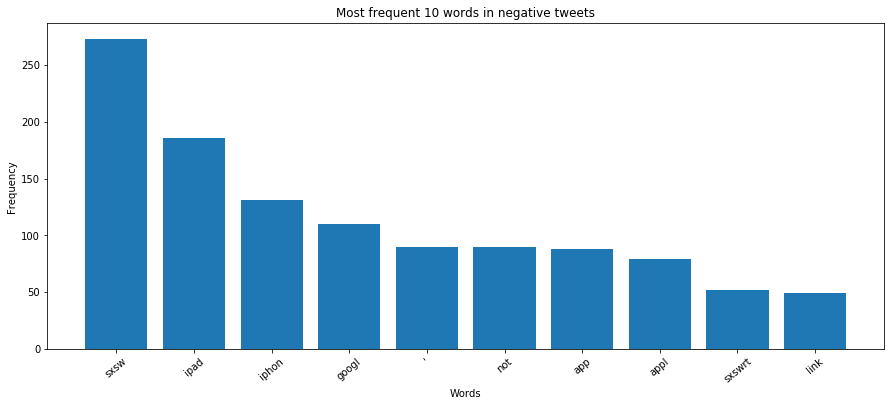

In [82]:
x_values=negative_df['word'][:10]
y_values=negative_df['word_count'][:10]
plt.figure(figsize=(15,6))
plt.bar(x_values, y_values, label="most frequent words")
plt.xlabel("Words")
plt.xticks( top_negative['word'][:10], rotation=40) 
plt.ylabel("Frequency")
plt.title('Most frequent 10 words in negative tweets')
plt.show()

## 'Brand' column

In [83]:
clean_dataset_decided['Brand'].value_counts()

iPad                               917
Apple                              636
iPad or iPhone App                 459
Google                             412
iPhone                             286
Other Google product or service    283
Android App                         79
Android                             76
Other Apple product or service      34
Name: Brand, dtype: int64

In [84]:
#Replace Apple ad=nd Google products and services with the actual brand.
clean_dataset_decided.Brand = clean_dataset_decided.Brand.replace({'iPad' : 'apple', 'Apple' : 'apple', 'Apple'  : 'apple', 'iPad or iPhone App' : 'apple','Google'     : 'google','iPhone'   : 'apple', 'Other Google product or service' : 'google','Android App' : 'google', 'Android'  : 'google', 'Other Apple product or service' : 'apple'})

In [85]:
clean_dataset_decided['Brand'].value_counts()

apple     2332
google     850
Name: Brand, dtype: int64

In [86]:
clean_dataset_decided['Brand'].isnull().values.any()

True

In [87]:
check_for_nan = clean_dataset_decided[clean_dataset_decided['Brand'].isnull()]
print(len(check_for_nan))
print (check_for_nan)
nan_index_list = check_for_nan.index
len(nan_index_list)

357
     Brand Sentiment                                        Clean_tweet
29     NaN         4  handheld hobo drafthous launch hobo shotgun ip...
52     NaN         4     spark android teamandroid award sxsw read link
63     NaN         4  smallbiz need review play googl placesw got ap...
74     NaN         4  sxsw lonelyplanet austin guid iphon free limit...
136    NaN         4  first day sxsw fun final present googl doodl g...
...    ...       ...                                                ...
3514   NaN         0  oh anoth way talk shit net googl launch major ...
3521   NaN         0  bad news updat popup appl store ipad not sure ...
3522   NaN         0  googl patent someth ie age domain rank algorit...
3534   NaN         0  googl guy sxsw talk explain made realist twitt...
3537   NaN         0  hey anyon sxsw sign group text app groupm got ...

[357 rows x 3 columns]


357

In [88]:
brand_vs_sentiment = clean_dataset_decided.drop(nan_index_list)

In [89]:
len(brand_vs_sentiment)

3182

In [90]:
brand_vs_sentiment['Brand'].value_counts()

apple     2332
google     850
Name: Brand, dtype: int64

In [91]:
brand_vs_sentiment['Sentiment'].value_counts()

4    2664
0     518
Name: Sentiment, dtype: int64

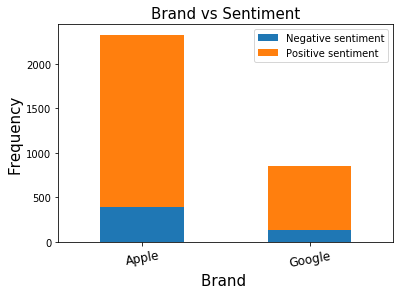

In [92]:
ct = pd.crosstab(brand_vs_sentiment.Brand, brand_vs_sentiment.Sentiment)
ct.plot.bar(stacked = True)
plt.xlabel('Brand ', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Brand vs Sentiment', fontsize = 15)
fbs_ticks = ['Apple', 'Google']
plt.xticks([0, 1], fbs_ticks, rotation = 10, fontsize = 12)
L = plt.legend()
L.get_texts()[1].set_text('Positive sentiment')
L.get_texts()[0].set_text('Negative sentiment')

In [93]:
apple = brand_vs_sentiment[(brand_vs_sentiment['Brand'] == 'apple')]
len(apple)
apple.Sentiment.value_counts(normalize= True)

4    0.834048
0    0.165952
Name: Sentiment, dtype: float64

In [94]:
google = brand_vs_sentiment[(brand_vs_sentiment['Brand'] == 'google')]

In [95]:
len(google)
google.Sentiment.value_counts(normalize= True)

4    0.845882
0    0.154118
Name: Sentiment, dtype: float64

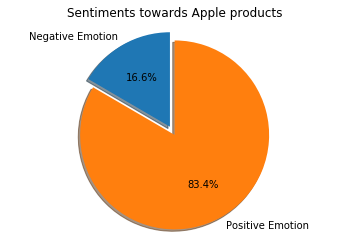

In [96]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Negative Emotion', 'Positive Emotion'
sizes = [16.59, 83.40]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sentiments towards Apple products')

plt.show()

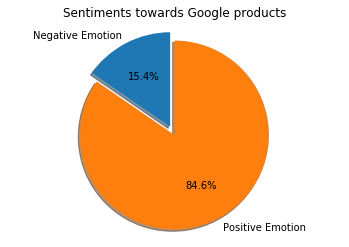

In [97]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Negative Emotion', 'Positive Emotion'
sizes = [15.41, 84.58]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sentiments towards Google products')

plt.show()

# Word2Vec Model

Word2vec is a learned representation that processes text by “vectorizing” words. Its input is a text corpus and its output is a set of vectors, (one vector per word): feature vectors that represent words in that corpus. Words that have the same meaning will have a similar representation. Word2vec turns text into a numerical form that deep neural networks can understand.

In [98]:
#Import Word2Vec model from gensim.
from gensim.models import Word2Vec

In [99]:
#tokenize data
data = dataset['Clean_tweet'].map(word_tokenize)

In [100]:
data[:2]

0    [g, iphon, hr, tweet, riseaustin, dead, need, ...
1    [know, awesom, ipadiphon, app, like, appreci, ...
Name: Clean_tweet, dtype: object

In [101]:
#Create Word2Vec model
model = Word2Vec(data, size=100, window=5, min_count=1, workers=4)

In [102]:
#train model
model.train(data, total_examples=model.corpus_count, epochs=10)

(758864, 1041060)

In [103]:
wv = model.wv

In [104]:
#Find most similar words to apple.
wv.most_similar('appl')


[('pop', 0.9507063031196594),
 ('sold', 0.938869833946228),
 ('popup', 0.9308668971061707),
 ('ipadwoohoo', 0.9293149709701538),
 ('outsid', 0.9242885112762451),
 ('consign', 0.9195542335510254),
 ('smartcov', 0.9175245761871338),
 ('vb', 0.9162024259567261),
 ('companyappl', 0.914233386516571),
 ('compan', 0.9140176773071289)]

In [105]:
#Find most similar words to google.
wv.most_similar('googl')

[('fare', 0.8398566246032715),
 ('nasdaq', 0.7954862117767334),
 ('wide', 0.7931785583496094),
 ('rumour', 0.7883650064468384),
 ('extraordinari', 0.7877053022384644),
 ('buzzquot', 0.7830265760421753),
 ('interest', 0.7764378190040588),
 ('search', 0.774138867855072),
 ('strategi', 0.7736921310424805),
 ("'stheme", 0.769503116607666)]

In [106]:
#Least similar words to apple
wv.most_similar(negative='appl')

[('lowest', 0.7692567706108093),
 ('booksel', 0.7456417083740234),
 ('zm', 0.659247875213623),
 ('flaw', 0.6525651812553406),
 ('hmmmhow', 0.6264435052871704),
 ('gamelay', 0.5359578132629395),
 ('itsnot', 0.511442244052887),
 ('bitlyih', 0.5023394227027893),
 ('geekeri', 0.4962354600429535),
 ('bezel', 0.48997581005096436)]

In [107]:
#Least similar words to google.
wv.most_similar(negative='googl')

[('booksel', 0.7268665432929993),
 ('lowest', 0.708800196647644),
 ('hmmmhow', 0.6526613235473633),
 ('gamelay', 0.5827547907829285),
 ('flaw', 0.5815341472625732),
 ('itsnot', 0.5569573640823364),
 ('zm', 0.536045253276825),
 ('bitlyih', 0.5205508470535278),
 ('exec', 0.45788881182670593),
 ('sucess', 0.44176819920539856)]